# Description
I this notebook I will perform ad Exploratory Data Analysis on NBA data.
I have been playing basketball since I was 5 years old and I'm very passionate about this sport.
It will be funny to combine my passion for basketball and my enthusiasm in data analysis.
I downloaded this dataset from [NBA Players Data](https://www.kaggle.com/justinas/nba-players-data).
It contains over two decades of data on each player who has been part of an NBA teams' roster. It captures demographic features such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, etc.

# 1 - Importing Data an

In [15]:
import pandas as pd   # Importing pandas

data = pd.read_csv("datasets/Nba/all_seasons.csv")   # importing the dataset
data.head()   # first five rows to have an overview

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [16]:
(data['Unnamed: 0'] == data.index).value_counts()

True    11700
dtype: int64

`Unnamed: 0` column is equal to the index of the DataFrame. I delete it immediately.

In [17]:
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

Dataset columns (I'll not describe features whose meaning is obvious):
- **player_name**
- **team_abbrevation**
- **age**
- **player_height**
- **player_weight**
- **college**
- **country**
- **draft_year**: year of entry into the league (info about NBA draft [here](https://en.wikipedia.org/wiki/NBA_draft#:~:text=The%20NBA%20draft%20is%20an,wish%20to%20join%20the%20league.&text=Sixty%20players%20are%20selected%20in,for%20at%20least%20one%20draft)).
- **draft_number**: position in which theplayer has been drafted.
- **draft_round**: round in which the player has been selected.
- **gp**: number of games played.
- **pts**: points per game.
- **reb**: rebounds per game.
- **ast**: assists per game.
- **net rating**: Net rating is the offensive rating minus the defensive rating, but simply put it can be defined as how much better or worse the team is when a specific player is on the court. 
-  **dreb_pct**: the percentage of a team's defensive rebounds that a player has while on the court
- **usg_pct**:  the percentage of team plays used by a player when they are on the floor
-  **ts_pct**: True shooting percentage. A shooting percentage that factors in the value of three-point field goals and free throws in addition to conventional two-point field goals
- **ast_pct**: the percentage of a team's assists that a player has while on the court
- **season**: year of the season   

In [18]:
data.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


What is the time span covered by the dataset?

In [19]:
season_range = [data['season'].min(), data['season'].max()]
season_range

['1996-97', '2020-21']

These data shows all players from 1996-97 to 2020-21 season, WOW!
Let's see how many players played in each season:

In [20]:
data.groupby('season').agg({'count'}).iloc[:,0]

season
1996-97    441
1997-98    439
1998-99    439
1999-00    438
2000-01    441
2001-02    440
2002-03    428
2003-04    442
2004-05    464
2005-06    458
2006-07    458
2007-08    451
2008-09    445
2009-10    442
2010-11    452
2011-12    478
2012-13    469
2013-14    482
2014-15    492
2015-16    476
2016-17    486
2017-18    540
2018-19    530
2019-20    529
2020-21    540
Name: (player_name, count), dtype: int64

It seems that in 2017-18 season the number of players in the league grew significantly
(of 11.1%) and passed 500 players.

Actually there are 30 teams in the NBA, but along the years some franchises failed
and some joined the league.
How many franchise there have been since 1996?

In [21]:
len(data['team_abbreviation'].unique())

36

And which are the ones that aren't in the league now?

In [22]:
set(data['team_abbreviation'].unique()) - set(data.loc[data['season'] == '2020-21','team_abbreviation'].unique())

{'CHH', 'NJN', 'NOH', 'NOK', 'SEA', 'VAN'}

These abbreviations stand for:
- Charlotte Hornets
- New Jersey Nets: currently they are the Brooklyn Nets
- New Orleans Hornets: currently they are New rleans Pelicans
- NOK: New Orleans/Oklahoma 2005/08 seasons
- Seattle Supersonics
- Vancouver Grizzlies

How many players have been in the league for 15+ seasons? Which are them?

In [23]:
players = data.groupby('player_name').agg('count').iloc[:,0]
veterans = players[players > 15].sort_values(ascending=False)
veterans

player_name
Vince Carter         22
Dirk Nowitzki        21
Kobe Bryant          20
Kevin Garnett        20
Jamal Crawford       20
Paul Pierce          19
Jason Terry          19
Tyson Chandler       19
Tim Duncan           19
Tony Parker          18
LeBron James         18
Steve Nash           18
Ray Allen            18
Jermaine O'Neal      18
Nazr Mohammed        18
Derek Fisher         18
Udonis Haslem        18
Carmelo Anthony      18
Pau Gasol            18
Metta World Peace    17
Andre Iguodala       17
Marcus Camby         17
Nene                 17
Kyle Korver          17
Mike Miller          17
Kurt Thomas          17
Juwan Howard         17
Joe Johnson          17
Jerry Stackhouse     17
Jason Kidd           17
Trevor Ariza         17
Elton Brand          17
Dwight Howard        17
Chauncey Billups     17
Zach Randolph        17
Andre Miller         17
Richard Jefferson    17
Shawn Marion         16
Al Harrington        16
Rashard Lewis        16
Manu Ginobili        16
Lou 

In [24]:
len(players[players > 15])

50

Only 50 players last more than 15 seasons in the NBA. Vince Carter is the one who
played the most: 22 seasons! A monster. It's very difficult to last many seasons
in the league, due to the great intensity to which player bodies are subjected.

A new question came up to my mind: how many players there are in the dataset?

In [25]:
len(data['player_name'].unique())

2333

About only 2% of players have been able to play more than 15 seasons.

# Feature Distribution

## Age

In [26]:
data['age'].describe()

count    11700.000000
mean        27.131966
std          4.340006
min         18.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64

Players age in the NBA goes from 18 to a max of 44 years old. The average is about
27 years old, and it is greater than the median. It means that age distribution
is right skewed.
We can visualize this concept with a boxplot and a histogram:

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NBA players Age Boxplot')

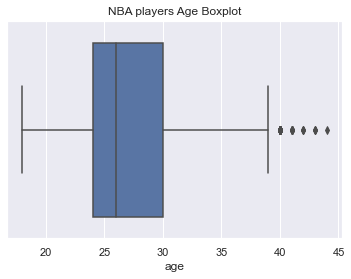

In [36]:
sns.boxplot(data['age']).set_title('NBA players Age Boxplot')

Text(0.5, 1.0, 'NBA players age histogram')

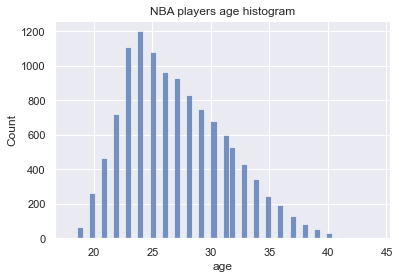

In [38]:
sns.histplot(data['age']).set_title('NBA players age histogram')

It could be interesting to see players' age in every season:

In [43]:
import numpy as np

pd.pivot_table(data=data, index='season', values='age', aggfunc=np.mean)

,age
season,
1996-97,27.963719
1997-98,28.084282
1998-99,28.002278
1999-00,28.107306
2000-01,28.097506
2001-02,27.672727
2002-03,27.530374
2003-04,27.457014
2004-05,27.297414


It seems that the average has slightly decreased over years.

## Player height

In [40]:
data['player_height'].describe()

count    11700.000000
mean       200.728501
std          9.169827
min        160.020000
25%        193.040000
50%        200.660000
75%        208.280000
max        231.140000
Name: player_height, dtype: float64

NBA players are tall more than 2 meters on average! But the standard deviation
is quite high.
There is a player taller than 230 centimeters! I think he is Chinese player Yao Ming. Let's
see if I'm right:

In [47]:
data.loc[data['player_height'] > 230, 'player_name'].unique()

array(['Gheorghe Muresan'], dtype=object)

I was wrong, he is Gheorghe Muresan. I don't know him.
Then how much is taller Yao Ming?

In [51]:
data.loc[data['player_name'] == 'Yao Ming', ['player_name', 'player_height']]

,player_name,player_height
2776,Yao Ming,226.06
3246,Yao Ming,228.60
3661,Yao Ming,228.60
4281,Yao Ming,228.60
4795,Yao Ming,228.60
5277,Yao Ming,228.60
5483,Yao Ming,228.60
6374,Yao Ming,228.60


Now let's see players' height distribution.

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NBA players height boxplot')

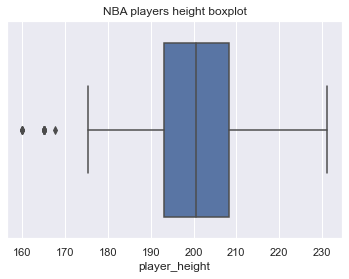

In [53]:
sns.boxplot(data['player_height']).set_title('NBA players height boxplot')

Text(0.5, 1.0, 'NBA players height Histogram')

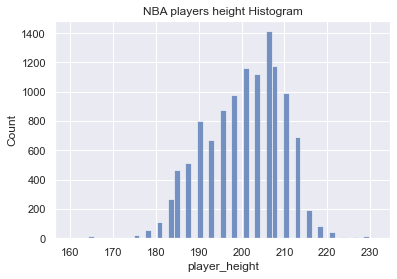

In [55]:
sns.histplot(data['player_height']).set_title('NBA players height Histogram')

## Player weight

In [56]:
data['player_weight'].describe()

count    11700.000000
mean       100.526791
std         12.526481
min         60.327736
25%         90.718400
50%         99.790240
75%        108.862080
max        163.293120
Name: player_weight, dtype: float64

NBA players weight about 100 kg on average.
Surely weight and height are correlated:

In [58]:
data[['player_weight', 'player_height']].corr()

,player_weight,player_height
player_weight,1.000000,0.827301
player_height,0.827301,1.000000


In fact, they are highly correlated.

Now I wanna see the best player in each statistic (advanced or not)

## Statistics

**pts**: points per game.
- **reb**: rebounds per game.
- **ast**: assists per game.
- **net rating**: Net rating is the offensive rating minus the defensive rating, but simply put it can be defined as how much better or worse the team is when a specific player is on the court. 
-  **dreb_pct**: the percentage of a team's defensive rebounds that a player has while on the court
- **usg_pct**:  the percentage of team plays used by a player when they are on the floor
-  **ts_pct**: True shooting percentage. A shooting percentage that factors in the value of three-point field goals and free throws in addition to conventional two-point field goals
- **ast_pct**: the percentage of a team's assists that a player has while on the court
- **season**: year of the season   

Correlations:

<AxesSubplot:>

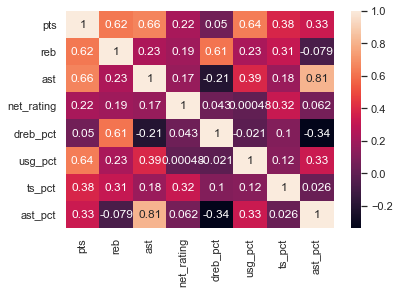

In [60]:
correlations = data[['pts', 'reb', 'ast', 'net_rating', 'dreb_pct', 'usg_pct',
                     'ts_pct', 'ast_pct']].corr()
sns.heatmap(correlations, annot=True)

The reader can see who is the player with the best statistics.
I will only see the one with max points, assists and rebounds:

In [66]:
data[['pts', 'reb', 'ast', 'net_rating',
    'oreb_pct', 'dreb_pct', 'usg_pct',
    'ts_pct', 'ast_pct']].max()

pts            36.1
reb            16.3
ast            11.7
net_rating    300.0
oreb_pct        1.0
dreb_pct        1.0
usg_pct         1.0
ts_pct          1.5
ast_pct         1.0
dtype: float64

Who scored more points? Who grabbed more rebounds? Who made more assist?
And in which season?
(Remember that every statistic is calculated on average per game)

In [69]:
print(data.loc[data['pts'] == data['pts'].max(), ['player_name', 'pts', 'season']])

        player_name   pts   season
10507  James Harden  36.1  2018-19


In [70]:
print(data.loc[data['ast'] == data['ast'].max(), ['player_name', 'ast', 'season']])

             player_name   ast   season
6951         Rajon Rondo  11.7  2011-12
8884         Rajon Rondo  11.7  2015-16
11450  Russell Westbrook  11.7  2020-21


In [71]:
print(data.loc[data['reb'] == data['reb'].max(), ['player_name', 'reb', 'season']])

        player_name   reb   season
2152  Danny Fortson  16.3  2000-01


# Conclusion

This was a funny and introductive analysis, the reader could go deeper and extract
more insight from this dataset.

# References
- [NBA Players Data](https://www.kaggle.com/justinas/nba-players-data)
- [Wikipedia](https://en.wikipedia.org)